## 1. IMPORTACIONES Y LECTURA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns = None

In [2]:
df = pd.read_json('business_tmr.json')

## 2. COMPRENSIÓN DE LOS DATOS

In [4]:
print('Tamaño del dataset:', df.shape)

Tamaño del dataset: (467776, 10)


In [5]:
print('Primeras 3 filas del dataset:')
df.head(3)

Primeras 3 filas del dataset:


,business_id,state,review_id,user_id,stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,CA,BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,CA,uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,CA,a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57


In [6]:
print('Nombres de columnas del dataset:')
df.columns

Nombres de columnas del dataset:


Index(['business_id', 'state', 'review_id', 'user_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date'],
      dtype='object')

In [7]:
print('Tipos de datos:')
df.dtypes

Tipos de datos:


business_id            object
state                  object
review_id              object
user_id                object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [8]:
print('Estadísticas descriptivas del dataset:')
df.describe()

Estadísticas descriptivas del dataset:


,stars,useful,funny,cool,date
count,467776.000000,467776.000000,467776.000000,467776.000000,467776
mean,3.802168,1.013276,0.302341,0.493428,2017-01-06 09:19:36.859819776
min,1.000000,0.000000,0.000000,0.000000,2005-03-01 17:59:26
25%,3.000000,0.000000,0.000000,0.000000,2015-01-13 05:39:13.750000128
50%,4.000000,0.000000,0.000000,0.000000,2017-05-30 21:26:15
75%,5.000000,1.000000,0.000000,0.000000,2019-05-29 22:39:41.500000
max,5.000000,261.000000,141.000000,166.000000,2022-01-19 19:45:43
std,1.394104,2.574897,1.358861,2.014146,NaN


## 3. PREPARACIÓN DE DATOS

In [3]:
# Cambiamos el nombre a la columna 'text' por el nombre 'review':
df = df.rename(columns = {'text': 'review'})

## 4. COMPRENSIÓN DE FEATURES (ANÁLISIS UNIVARIADO)

Diagrama de barras:

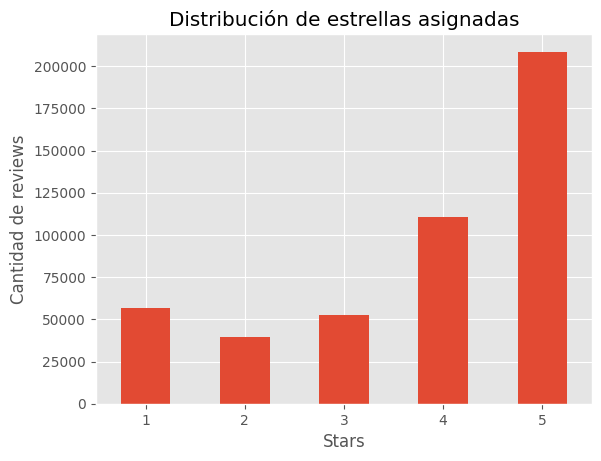

In [28]:
ax = df['stars'].value_counts().sort_index().plot(kind = 'bar', title = 'Distribución de estrellas asignadas')
ax.set_xlabel('Stars')
ax.set_ylabel('Cantidad de reviews')

# Establecemos la visualización de etiquetas del eje x en formato horizontal:
plt.xticks(rotation = 0)

plt.show()

Histograma:

In [17]:
# Primero crearemos un dataframe nuevo que contenga los business_id únicos junto a sus promedios de estrellas:

lista_promedios = []
lista_negocios = []
for b in df['business_id']:
    if b not in lista_negocios:
        lista_negocios.append(b)
        s = df.loc[df['business_id']== b]
        e = s['stars'].mean()
        lista_promedios.append(e)

df_business = pd.DataFrame()
df_business['id_business'] = lista_negocios
df_business['stars_avg'] = lista_promedios


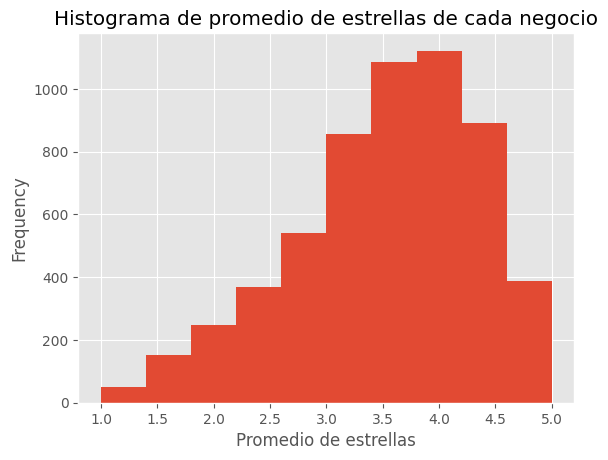

In [18]:
# Ahora realizamos el histograma:
ax = df_business['stars_avg'].plot(kind = 'hist', bins = 10, title = 'Histograma de promedio de estrellas de cada negocio')
ax.set_xlabel('Promedio de estrellas')
plt.show()

Densidad de probabilidad:

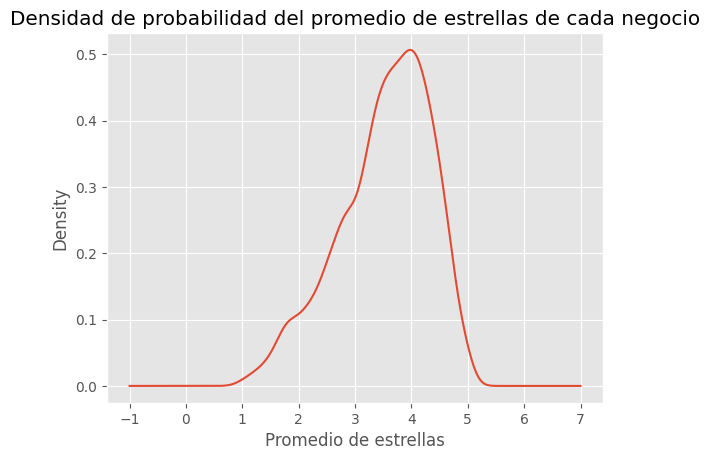

In [21]:
ax = df_business['stars_avg'].plot(kind = 'kde', title = 'Densidad de probabilidad del promedio de estrellas de cada negocio')
ax.set_xlabel('Promedio de estrellas')
plt.show()

## 5. RELACIÓN ENTRE FEATURES

Diagrama de dispersión:

In [29]:
# En primer lugar, al dataframe "df_business" creado anteriormente ahora le agregaremos una 
# nueva columna compuesta por el conteo de reviews de cada negocio:

lista_negocios = []
lista_cantidad_reviews = []
for b in df['business_id']:
    if b not in lista_negocios:
        
        lista_negocios.append(b)
        s = df.loc[df['business_id'] == b]
        e = s.shape[0]
        lista_cantidad_reviews.append(e)


df_business['reviews_count'] = lista_cantidad_reviews

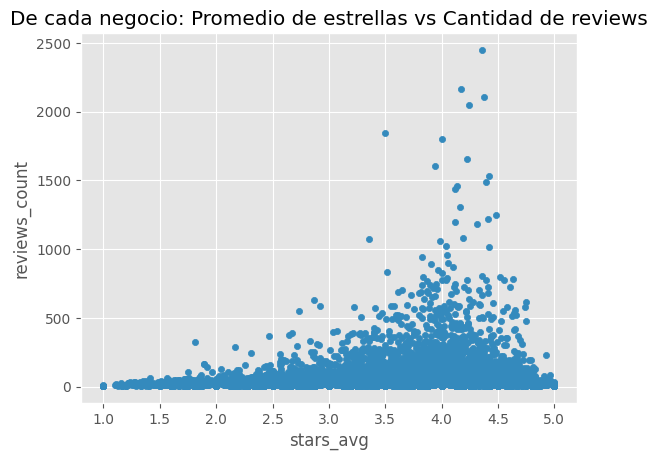

In [34]:
# Ahora usaremos nuestra anterior columna creada para la realización d eun diagrama de dispersión:

df_business.plot(kind = 'scatter', x = 'stars_avg', y = 'reviews_count', title = 'De cada negocio: Promedio de estrellas vs Cantidad de reviews')
plt.show()

## 6. WORDCLOUD

Wordcloud respecto al estado de Indiana:

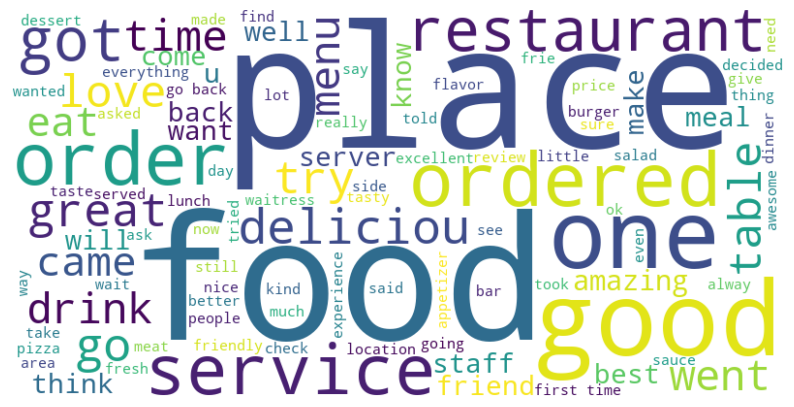

In [39]:
# WordCloud respecto al estado de Indiana (IN):
from wordcloud import WordCloud
s = df.loc[df['state'] == 'IN']
texto_columna = ' '.join(s['review'])
wordcloud = WordCloud(width = 800, height = 400, max_words = 100, background_color = 'white').generate(texto_columna)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Wordcloud respecto al estado de California:

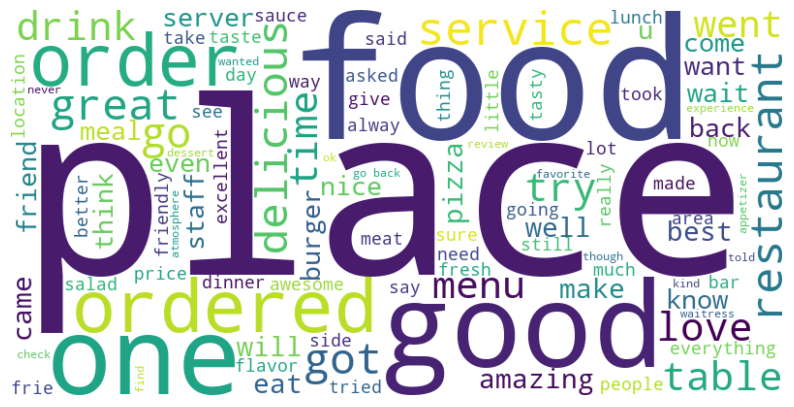

In [40]:
# WordCloud respecto al estado de California (CA):
from wordcloud import WordCloud
s = df.loc[df['state'] == 'CA']
texto_columna = ' '.join(s['review'])
wordcloud = WordCloud(width = 800, height = 400, max_words = 100, background_color = 'white').generate(texto_columna)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Wordcloud respecto al estado de Texas:

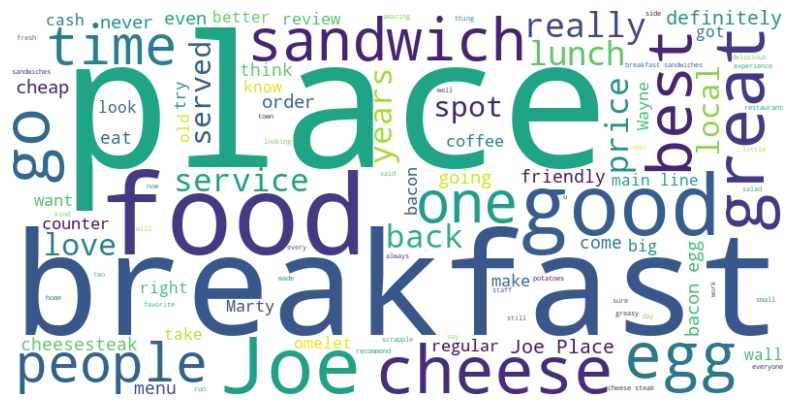

In [41]:
# WordCloud respecto al estado de Texas (TX):
from wordcloud import WordCloud
s = df.loc[df['state'] == 'TX']
texto_columna = ' '.join(s['review'])
wordcloud = WordCloud(width = 800, height = 400, max_words = 100, background_color = 'white').generate(texto_columna)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()